In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv("Telco_Customer_Churn_Dataset.csv")

if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns.drop('Churn')

df[num_cols] = SimpleImputer(strategy='median').fit_transform(df[num_cols])
df[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[cat_cols])

df['ChurnFlag'] = df['Churn'].map({'Yes':1,'No':0})

df_enc = pd.get_dummies(df.drop(columns=['Churn']), columns=cat_cols, drop_first=True)

X = df_enc.drop(columns=['ChurnFlag'])
y = df_enc['ChurnFlag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

print("✅ Dataset ready for feature importance analysis")


✅ Dataset ready for feature importance analysis


In [3]:
rf_clf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf_clf.fit(X_train, y_train)

print("✅ Random Forest trained for feature importance")


✅ Random Forest trained for feature importance


In [4]:
importances = rf_clf.feature_importances_
features = X.columns

feat_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

print("Top Features Influencing Churn:")
print(feat_importances.head(10))


Top Features Influencing Churn:
                           Feature  Importance
3                     TotalCharges    0.177862
1                           tenure    0.162314
2                   MonthlyCharges    0.152663
25               Contract_Two year    0.059549
10     InternetService_Fiber optic    0.041042
28  PaymentMethod_Electronic check    0.036058
24               Contract_One year    0.030310
13              OnlineSecurity_Yes    0.028805
4                      gender_Male    0.026180
26            PaperlessBilling_Yes    0.024557


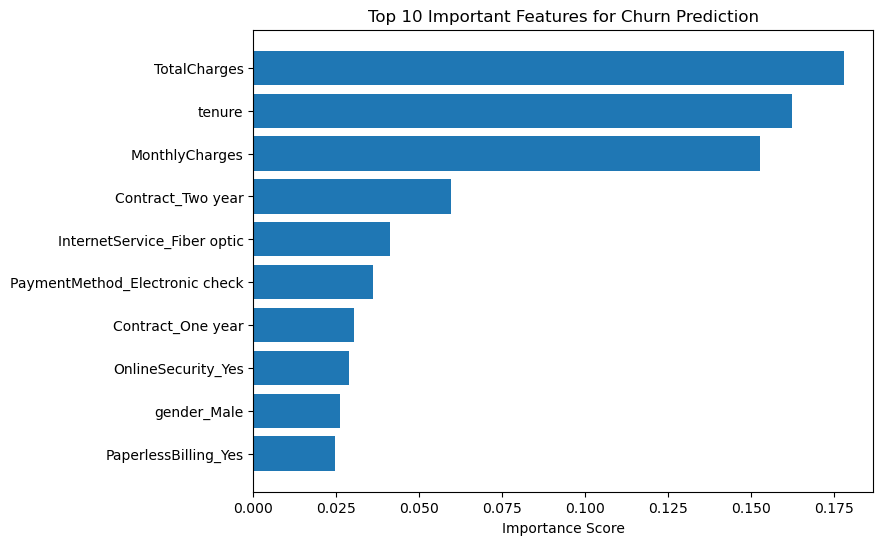

In [5]:
plt.figure(figsize=(8,6))
plt.barh(feat_importances['Feature'][:10], feat_importances['Importance'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Important Features for Churn Prediction")
plt.xlabel("Importance Score")
plt.show()


In [6]:
print("📊 Business Insights based on feature importance:")
print("- High importance of Contract type → Customers with Month-to-Month contracts churn more.")
print("- High importance of Tenure → New customers (short tenure) churn at higher rates.")
print("- High importance of MonthlyCharges → Customers with higher charges are more likely to churn.")
print("- InternetService & PaymentMethod also play a big role in customer decisions.")


📊 Business Insights based on feature importance:
- High importance of Contract type → Customers with Month-to-Month contracts churn more.
- High importance of Tenure → New customers (short tenure) churn at higher rates.
- High importance of MonthlyCharges → Customers with higher charges are more likely to churn.
- InternetService & PaymentMethod also play a big role in customer decisions.
